# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "D:\\Trimester 233\\Fydp-2\\data"

In [2]:
exec(open('D:\\Trajectory_curated_dataset\\diverging-trajectories\\src\\notebooks\\init_notebook.py').read())

current working dirD:\Trajectory_curated_dataset\diverging-trajectories\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os


from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
file = os.path.join(dataDir, "2023-05-04-fps-10-scene-120-pedestrians.csv")
pedDf = pd.read_csv(file)
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,7,2837,7031,120,6,1.124720,2.937980,0.094399,0.661993,-0.041189,-0.017147
1,7,2839,7031,120,6,1.104773,2.806522,0.099737,0.657291,-0.026693,0.023511
2,7,2841,7031,120,6,1.083963,2.676619,0.104051,0.649513,-0.021567,0.038891
3,7,2843,7031,120,6,1.062389,2.548470,0.107869,0.640745,-0.019092,0.043841
4,7,2845,7031,120,6,1.040278,2.421467,0.110556,0.635017,-0.013435,0.028638


In [6]:
visualizer = TrajectoryVisualizer()

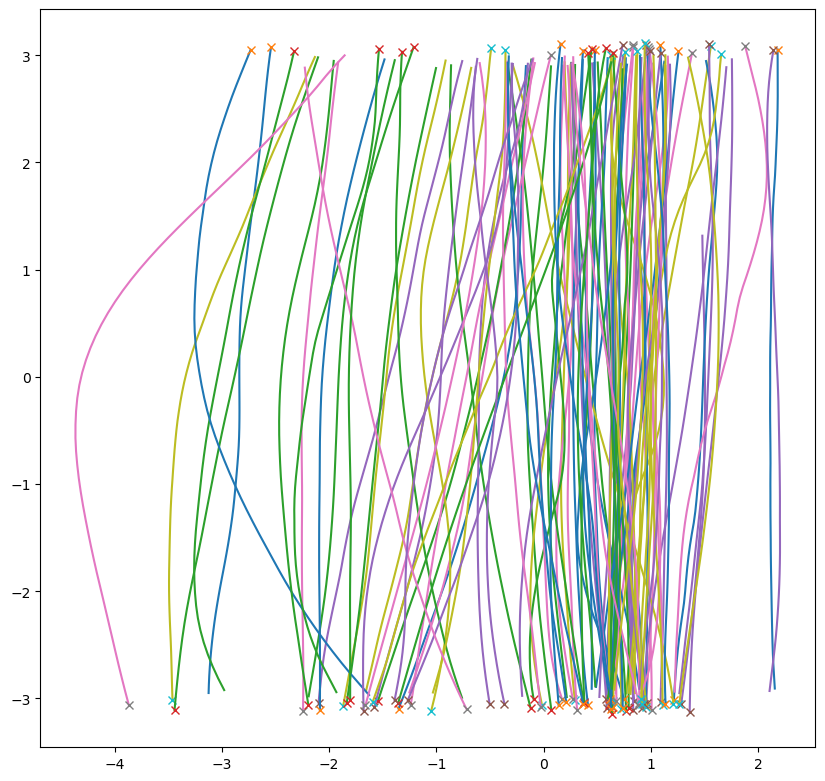

In [7]:
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [87]:
pedDf["uniqueTrackId"].unique()

array([ 7031,  7038,  7039,  7048,  7073,  7077,  7091,  7112,  8115,
        8138,  8141,  8142,  8143,  8163,  8213,  8215,  8265,  8299,
        8363,  8375,  9002,  9061,  9096,  9100,  9126,  9155,  9210,
       10072, 10081, 11071, 11133, 11239, 12001, 12059, 12121, 12153,
       12154, 12156, 12207, 12257, 12263, 12310, 12316, 12351, 12358,
       13047, 13048, 13096, 13121, 13136, 13146, 13182, 13236, 13240,
       13241, 13244, 13246, 13250, 13252, 13269, 13278, 13304, 14050,
       14060, 14134, 14136, 14145, 14151, 14176, 14203, 14221, 14282,
       14336, 14343, 15046, 15067, 15069, 15073, 15080, 15093, 15181,
       15197, 15233, 15248, 15302, 15307, 15312, 16002, 16016, 16020,
       16050, 16061, 16080, 16081, 16114, 16155, 16159, 16204, 16222,
       16235, 16288, 16291, 16294, 16318, 16335, 16407, 16413, 16434,
       17048, 17053, 17147, 17162, 17320], dtype=int64)

In [88]:
singleTrack = pedDf[pedDf["uniqueTrackId"]==7031]

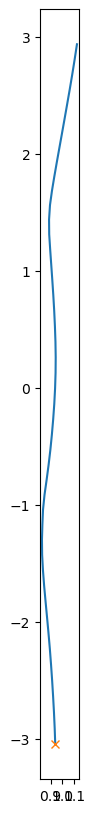

In [89]:
visualizer.show(singleTrack, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [90]:
import matplotlib.pyplot as plot
%matplotlib qt

In [12]:
# plot.figure(figsize=(6,5))
# plot_axis = plot.axes (projection = '3d')
# pedIds = pedDf["uniqueTrackId"].unique()
# for pid in pedIds:
#     pedTrack = pedDf[pedDf["uniqueTrackId"]==pid]
#     timeSpace = np.linspace(0, len(pedTrack), len(pedTrack))
#     if len(pedTrack) > 70:
#         plot_axis.plot3D(pedTrack["sceneX"], pedTrack["sceneY"], timeSpace)
# plot.tight_layout ()
# plot.show ()

In [13]:
# visualizer.show3D(singleTrack, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [24]:
from diverging_trajectories.pattern import TimeIntervalSequenceExtractor
from diverging_trajectories.pattern import PatternModel

In [25]:
from diverging_trajectories.pattern import IntervalPatternSequence

In [31]:
extractor = TimeIntervalSequenceExtractor(
    fps=10,
    interval=1,
    extendLast=False,
    xCol="sceneX",
    yCol="sceneY",
)
extractor

14:07:48 [INFO] TimeIntervalSequenceExtractor: fps=10, patternSize=10


In [32]:
patterns = extractor.extract("18128", singleTrack)
patterns

In [18]:
# singleTrack.tail()

In [19]:
# singleTrack.head()

In [33]:
from diverging_trajectories.pattern import IntervalPatternRepository
from peewee import *
db = SqliteDatabase('pattern.db', field_types={'points': 'text'})
print(db)
db.create_tables([IntervalPatternSequence, PatternModel])
db.close()

False

In [34]:
repo = IntervalPatternRepository(intervalType="time")
repo.addSequence(
    sourceId="18120", interval=1,
    patterns=patterns)

IntegrityError: UNIQUE constraint failed: interval_pattern_sequence.sourceId

In [30]:

readPatterns = repo.getAll()
for p in readPatterns:
    print("seqno", p.patternSeqNo)

AttributeError: 'IntervalPatternRepository' object has no attribute 'getAll'

In [23]:
p.points

[[1.5829816207915552, 2.7033951669033005],
 [1.5827590511633494, 2.797631247906073],
 [1.5829118774745314, 2.894845982612897],
 [1.5835621997955314, 2.9946227278037427],
 [1.58458154121132, 3.095666881732007]]